In [1]:
import numpy as np
import torch
import torchvision
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('~/Downloads/mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('~/Downloads/mnis', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

# Defining a Convolutional Neural Network

In [3]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x, dim=1)
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [4]:
image_number = 0
trainset[image_number][0].numpy().shape  # C x W x H

(1, 28, 28)

In [5]:
trainset[image_number][0].numpy().flatten().shape

(784,)

## plot a sample from the data set

In [6]:
def plot_sample(image_number=0):
    f, axs = plt.subplots(1, 2 ,figsize=(10, 5))
    axs[0].imshow(trainset[image_number][0][0].numpy())
    axs[0].set_title(f"label: {trainset[image_number][1]}")
    axs[0].set_axis_off()
    axs[1].bar(range(10), (model(trainset[image_number][0][None])).detach().numpy()[0])
    axs[1].ylabel("prediction probablity")
    axs[1].xlabel("class")
    plt.show()
interact(plot_sample, image_number=(0, 20))

interactive(children=(IntSlider(value=0, description='image_number', max=20), Output()), _dom_classes=('widget…

<function __main__.plot_sample(image_number=0)>

## see the prediction of the number with random weights

<BarContainer object of 10 artists>

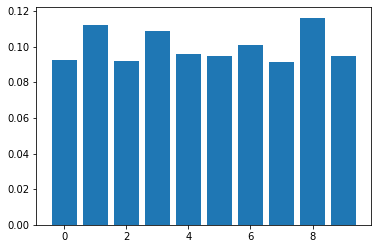

In [7]:
plt.bar(range(10), (model(trainset[image_number][0][None])).detach().numpy()[0])

## train the network

In [8]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

n_epochs = 15
for epoch_number in range(n_epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch_number, running_loss/len(trainloader)))

Epoch 0 - Training loss: 2.3016791094594926
Epoch 1 - Training loss: 2.2965015078912665
Epoch 2 - Training loss: 2.1602736909760596
Epoch 3 - Training loss: 1.9025958424438036
Epoch 4 - Training loss: 1.7536911595859
Epoch 5 - Training loss: 1.6882807013830905
Epoch 6 - Training loss: 1.656633584738286
Epoch 7 - Training loss: 1.6346824442399845
Epoch 8 - Training loss: 1.621499135041796
Epoch 9 - Training loss: 1.6122724130463753
Epoch 10 - Training loss: 1.6023927513978629
Epoch 11 - Training loss: 1.5975757880505723
Epoch 12 - Training loss: 1.5901254780256926
Epoch 13 - Training loss: 1.5847798940469462
Epoch 14 - Training loss: 1.5801970419853226


## check again the prediction with the trained weights

In [11]:
def plot_sample(image_number=0):
    f, axs = plt.subplots(1, 2 ,figsize=(10, 5))
    axs[0].imshow(trainset[image_number][0][0].numpy())
    axs[0].set_title(f"label: {trainset[image_number][1]}")
    axs[0].set_axis_off()
    axs[1].bar(range(10), (model(trainset[image_number][0][None])).detach().numpy()[0])
    axs[1].set_ylabel("prediction probablity")
    axs[1].set_xlabel("class")
interact(plot_sample, image_number=(0, 20))

interactive(children=(IntSlider(value=0, description='image_number', max=20), Output()), _dom_classes=('widget…

<function __main__.plot_sample(image_number=0)>